In [1]:
import pickle as pkl
import json

In [15]:
detection_file = '/data/home/lanyanyan/hongxin/code/reason/tvr_extend_tool/ns-vqa/data/mask_rcnn/results/clevr_val_pretrained/detections.pkl'

In [31]:
ann_file = '/data/home/lanyanyan/hongxin/code/reason/tvr_extend_tool/ns-vqa/data/raw/CLEVR_mini/CLEVR_mini_coco_anns.json'

In [16]:
data = pkl.load(open(detection_file, 'rb'))

In [17]:
data.keys()

dict_keys(['all_boxes', 'all_segms', 'all_keyps', 'cfg'])

In [23]:
print(len(data['all_boxes'][0]))

4000


In [30]:
data['all_boxes'][5][1]

array([], shape=(0, 5), dtype=float32)

In [33]:
with open(ann_file) as f:
    ann = json.load(f)

In [50]:
from pycocotools.mask import decode

In [53]:
decode(ann['scenes'][0]['objects'][0]['mask'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [49]:
ann['scenes'][0]['objects'][0]['mask']['counts']

str

In [39]:
print(len(ann['scenes']))
ann['scenes'][0]

4000


{'split': 'new',
 'directions': {'above': [0.0, 0.0, 1.0],
  'front': [0.754490315914154, -0.6563112735748291, -0.0],
  'left': [-0.6563112735748291, -0.7544902563095093, 0.0],
  'behind': [-0.754490315914154, 0.6563112735748291, 0.0],
  'right': [0.6563112735748291, 0.7544902563095093, -0.0],
  'below': [-0.0, -0.0, -1.0]},
 'image_index': 0,
 'relationships': {'behind': [[1, 5, 7, 9],
   [],
   [0, 1, 5, 6, 7, 9],
   [0, 1, 2, 4, 5, 6, 7, 8, 9],
   [0, 1, 2, 5, 6, 7, 8, 9],
   [1, 7],
   [0, 1, 5, 7, 9],
   [1],
   [0, 1, 2, 5, 6, 7, 9],
   [1, 5, 7]],
  'front': [[2, 3, 4, 6, 8],
   [0, 2, 3, 4, 5, 6, 7, 8, 9],
   [3, 4, 8],
   [],
   [3],
   [0, 2, 3, 4, 6, 8, 9],
   [2, 3, 4, 8],
   [0, 2, 3, 4, 5, 6, 8, 9],
   [3, 4],
   [0, 2, 3, 4, 6, 8]],
  'right': [[5, 6, 8],
   [0, 3, 5, 6, 7, 8],
   [0, 1, 3, 4, 5, 6, 7, 8],
   [0, 5, 6, 7, 8],
   [0, 1, 3, 5, 6, 7, 8],
   [6],
   [],
   [0, 5, 6, 8],
   [5, 6],
   [0, 1, 2, 3, 4, 5, 6, 7, 8]],
  'left': [[1, 2, 3, 4, 7, 9],
   [2, 4, 9],


In [40]:
scene_file = '/data/home/lanyanyan/hongxin/data/clevr/scenes.json'

In [41]:
with open(scene_file) as f:
    scene = json.load(f)

In [44]:
scene['scenes'][0]

{'image_index': 0,
 'objects': [{'color': 'brown',
   'size': 'large',
   'rotation': 178.92387258999463,
   'shape': 'cylinder',
   '3d_coords': [-1.4937210083007812, -1.9936031103134155, 0.699999988079071],
   'material': 'rubber',
   'pixel_coords': [119, 131, 10.801968574523926]},
  {'color': 'gray',
   'size': 'large',
   'rotation': 243.405459279722,
   'shape': 'cube',
   '3d_coords': [1.555708646774292, -2.104736566543579, 0.699999988079071],
   'material': 'rubber',
   'pixel_coords': [198, 190, 8.60103988647461]},
  {'color': 'green',
   'size': 'small',
   'rotation': 230.45235024165092,
   'shape': 'cylinder',
   '3d_coords': [-2.342184543609619, -0.5205014944076538, 0.3499999940395355],
   'material': 'rubber',
   'pixel_coords': [161, 118, 12.372727394104004]},
  {'color': 'purple',
   'size': 'large',
   'rotation': 31.654351858799153,
   'shape': 'sphere',
   '3d_coords': [-0.8073106408119202, 1.914123773574829, 0.699999988079071],
   'material': 'metal',
   'pixel_coor

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [60]:
from model.block import resnet_fpn_backbone
import torch

In [160]:
resnet18 = resnet_fpn_backbone('resnet18', c_in=3)

In [161]:
x = torch.ones(10,3,120,160)

In [162]:
y = resnet18(x)

In [163]:
type(y)

collections.OrderedDict

In [64]:
print([(k, v.shape) for k, v in y.items()])

[('0', torch.Size([10, 256, 30, 40])), ('1', torch.Size([10, 256, 15, 20])), ('2', torch.Size([10, 256, 8, 10])), ('3', torch.Size([10, 256, 4, 5])), ('pool', torch.Size([10, 256, 2, 3]))]


In [37]:
from pycocotools.mask import encode, decode, toBbox

In [38]:
encode??

Signature: encode(bimask)
Docstring: <no docstring>
Source:   
def encode(bimask):
    if len(bimask.shape) == 3:
        return _mask.encode(bimask)
    elif len(bimask.shape) == 2:
        h, w = bimask.shape
        return _mask.encode(bimask.reshape((h, w, 1), order='F'))[0]
File:      ~/.miniconda3/lib/python3.7/site-packages/pycocotools/mask.py
Type:      function


In [18]:
import jsonlines

In [19]:
with jsonlines.open('/data/home/lanyanyan/hongxin/data/trance/data_mask.jsonl') as reader:
    data = list(reader)

In [31]:
toBbox(data[0]['states'][0]['objects'][0]['mask']['Camera_Center'])

array([0., 0., 0., 0.])

In [36]:
data[0]['states'][0]['objects'][0]['mask']['Camera_Center']['counts'] == 'PP[2'

True

In [ ]:
def get_bbox(data):
    init_objects = data['states'][0]['objects']

In [41]:
a = [1, 2]
b = [*a, *a]

In [42]:
b

[1, 2, 1, 2]

In [ ]:
with jsonlines.open('/data/home/lanyanyan/hongxin/data/trance/data_mask.jsonl') as reader:
    data = list(reader)

In [43]:
len(data)

530000

In [62]:
train_split = data[:500000]
val_split = data[500000:510000]
test_split = data[510000:530000]

In [61]:
import h5py
import json
from tqdm.notebook import tqdm

In [64]:
f = h5py.File('/data/home/lanyanyan/hongxin/data/trance/data.h5', 'r+', libver='latest')

In [65]:
train_data = f['train']['data']
for sample in tqdm(train_split):
    name = str(sample['idx'])
    f_sample = train_data[name]
    f_sample[...] = json.dumps(sample)

  0%|          | 0/500000 [00:00<?, ?it/s]

In [66]:
val_data = f['val']['data']
for sample in tqdm(val_split):
    name = str(sample['idx'])
    f_sample = val_data[name]
    f_sample[...] = json.dumps(sample)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [68]:
test_data = f['test']['data']
for sample in tqdm(test_split):
    name = str(sample['idx'])
    f_sample = test_data[name]
    f_sample[...] = json.dumps(sample)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [69]:
f.close()

In [70]:
f = h5py.File('/data/home/lanyanyan/hongxin/data/trance/data.h5', 'r', libver='latest')

## Test Boxes

In [9]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
from dataset.trance import Basic, View, Event
from torchvision.utils import draw_bounding_boxes
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from torchvision.ops._utils import convert_boxes_to_roi_format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [10]:
data_root='/data/home/lanyanyan/hongxin/data/trance'
split='train'
values_json='../data/gen_src/resource/values.json'
properties_json='../data/gen_src/resource/properties.json'

In [11]:
basic = Basic(data_root=data_root, split='train', values_json=values_json, properties_json=properties_json, use_box=True, img_aug=True)

In [12]:
convert_boxes_to_roi_format([torch.as_tensor(basic[0]['init_boxes']), torch.as_tensor(basic[1]['init_boxes'])])

tensor([[  0.0000,  -3.1908,   1.8395, 156.8092, 121.8395],
        [  0.0000,  12.3092,  63.3395,  38.8092,  94.3395],
        [  0.0000, 110.8092,  61.8395, 132.8092,  83.3395],
        [  1.0000,  -2.7442,  -0.7159, 157.2558, 119.2841],
        [  1.0000,  48.2558,  52.7841,  69.7558,  74.2841],
        [  1.0000,  98.7558,  74.7841, 111.2558,  91.2841],
        [  1.0000,  70.2558,  51.7841,  79.7558,  61.2841],
        [  1.0000,  66.2558,  22.2841,  91.7558,  48.2841],
        [  1.0000,  10.2558,  35.7841,  47.2558,  78.7841]])

dict_keys(['init', 'fin', 'init_desc', 'target', 'obj_target_vec', 'options', 'init_boxes', 'fin_boxes', 'n_init', 'n_fin'])


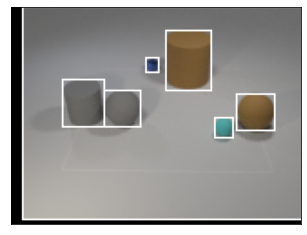

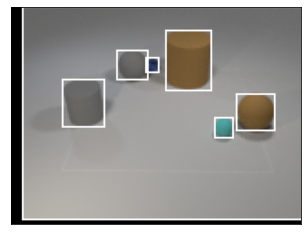

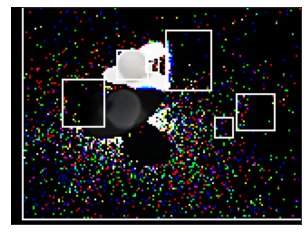

In [40]:
sample = basic[100]
print(sample.keys())
boxes = draw_bounding_boxes(torch.tensor(sample['init']), torch.tensor(sample['init_boxes']))
show(boxes)
boxes = draw_bounding_boxes(torch.tensor(sample['fin']), torch.tensor(sample['fin_boxes']))
show(boxes)
boxes = draw_bounding_boxes(torch.tensor(sample['fin']) - torch.tensor(sample['init']), torch.tensor(sample['fin_boxes']))
show(boxes)

array([[  0.       ,   1.8234928, 152.11198  , 121.823494 ],
       [106.111984 ,  61.823494 , 128.11198  ,  83.323494 ],
       [  7.6119876,  63.323494 ,  34.111988 ,  94.323494 ]],
      dtype=float32)

In [28]:
from dataset.collate import box_collate
train_loader = torch.utils.data.DataLoader(
    dataset=basic,
    batch_size=4,
    shuffle=False,
    num_workers=2,
    pin_memory=True,
    collate_fn=box_collate)

In [29]:
batch = next(iter(train_loader))

In [31]:
batch['init_boxes']

tensor([[  0.0000,   5.5124,   0.0000, 165.5124, 118.4006],
        [  0.0000,  21.0124,  59.9006,  47.5124,  90.9006],
        [  0.0000, 119.5124,  58.4006, 141.5124,  79.9006],
        [  1.0000,   7.3219,   0.0000, 167.3219, 119.6003],
        [  1.0000,  76.3219,  22.6003, 101.8219,  48.6003],
        [  1.0000,  58.3219,  53.1003,  79.8219,  74.6003],
        [  1.0000,  80.3219,  52.1003,  89.8219,  61.6003],
        [  1.0000,  20.3219,  36.1003,  57.3219,  79.1003],
        [  1.0000, 108.8219,  75.1003, 121.3219,  91.6003],
        [  2.0000,   2.1137,   3.0953, 162.1137, 123.0953],
        [  2.0000, 112.6137,  28.5953, 145.1137,  65.5953],
        [  2.0000, 134.6137,  83.5953, 147.1137,  95.5953],
        [  2.0000,  26.6137,  65.0953,  50.1137,  88.0953],
        [  2.0000,  62.1137,  48.5953,  78.1137,  67.0953],
        [  2.0000,  41.1137,  46.5953,  49.6137,  55.0953],
        [  2.0000,  75.1137,  76.0953,  86.6137,  87.5953],
        [  3.0000,   0.0000,   4.7891, 1

## Test Network

In [41]:
from model.encoder import DetectorEncoder

In [102]:
encoder = DetectorEncoder().cuda()

In [80]:
from dataset.collate import box_collate
train_loader = torch.utils.data.DataLoader(
    dataset=basic,
    batch_size=2,
    shuffle=False,
    num_workers=2,
    pin_memory=True,
    collate_fn=box_collate)
batch = next(iter(train_loader))
batch.keys()

dict_keys(['init', 'fin', 'init_desc', 'target', 'obj_target_vec', 'options', 'n_init', 'n_fin', 'init_boxes', 'fin_boxes'])

In [103]:
out = encoder(
    batch['init'].float().div(255).cuda(),
    batch['fin'].float().div(255).cuda(),
    batch['init_boxes'].cuda(),
    batch['fin_boxes'].cuda(),
    tuple(batch['n_init']),
    tuple(batch['n_fin'])
)
out.shape

torch.Size([9, 256])


torch.Size([2, 512])

In [92]:
x = torch.ones(2, 128)
x.shape

torch.Size([2, 128])

In [82]:
out.shape

torch.Size([2, 768])

In [89]:
y = mask.sum(dim=1, keepdim=True)
y.shape

torch.Size([2, 1])

In [93]:
y = torch.ones(2, 1)
y.shape

torch.Size([2, 1])

In [94]:
x / y

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1